# KNN From Scratch

In [1]:
#import libraries
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import copy
import requests
import zipfile
from io import BytesIO

# import NB from bayes.py
from bayes import NB


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Import dataset


In [3]:
#download data
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip'

request = requests.get(url)
file = zipfile.ZipFile(BytesIO(request.content))
file.extractall('./data/')

path='./data/SMSSpamCollection'
df = pd.read_csv(path,delimiter='\t',encoding = "ISO-8859-1", usecols=[0,1], names=["label", "message"], nrows=5000)

#inspect the head
print(df.head())


  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


## Transform data label

In [4]:
#transform the target into numeric codes
labelencoder= LabelEncoder()
data = copy.deepcopy(df)
data.label = labelencoder.fit_transform(data.label)

#original labels
orig_label = labelencoder.inverse_transform(data.label)

print(data.head())

   label                                            message
0      0  Go until jurong point, crazy.. Available only ...
1      0                      Ok lar... Joking wif u oni...
2      1  Free entry in 2 a wkly comp to win FA Cup fina...
3      0  U dun say so early hor... U c already then say...
4      0  Nah I don't think he goes to usf, he lives aro...


## Load your data into X and y

In [5]:
X,y = data.message.values, data.label.values

## Define train test split

In [6]:
train_X, test_X, y_train, y_test = train_test_split(X,y,test_size=.2,stratify=y,random_state=0)

## Fit the model

In [7]:
model = NB().fit(train_X,y_train)

## Plot words

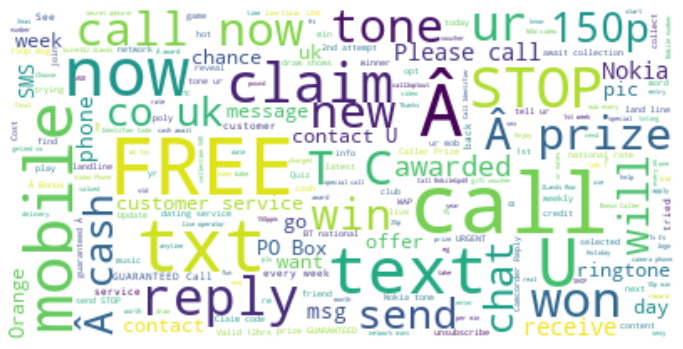

In [8]:
#To view picture of spam, id='s', ham: id='h', specific text: id='a' (any string except h and s)
model.text_by_image(id='s',count=200,text=None)

## Compute Accuracy

In [9]:
Train_pred_y = model.predict(train_X)
Test_pred_y = model.predict(test_X)

print('Train Accuracy {:0.2f}%'.format( model.evaluate(y_train,Train_pred_y)*100 ))
print('Test Accuracy {:0.2f}%'.format( model.evaluate(y_test,Test_pred_y)*100 ))

Train Accuracy 94.53%
Test Accuracy 90.80%


## Single value prediction with best model

spam


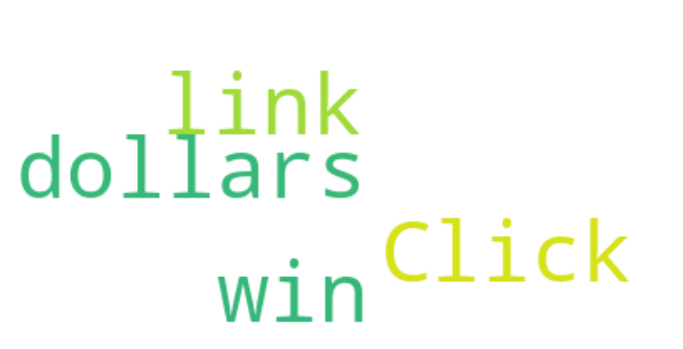

In [12]:
features = ['Click on this link to win 1000 dollars']
# features = ['Mum was sick but will soon recover, pray for her']

y_pred = model.predict(features)
y_pred = labelencoder.inverse_transform(y_pred)
print(y_pred[0])
model.text_by_image(id='a',count=200,text=features[0])